In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
# Загрузка данных
data = pd.read_excel('данные модуль 1.xlsx')

# Предварительный просмотр данных
print(data.head())


       v131      v132      v133  v134
0 -4.524858  0.579889  7.180352    15
1  2.453333 -0.339670  6.720415     7
2 -4.804977  3.298895  6.179200    11
3 -0.664316  0.805015  7.302714     9
4  7.296641  4.166122  7.505439     9


In [6]:

V1 = data['v131']
V2 = data['v132']
V3 = data['v133']
V4 = data['v134']


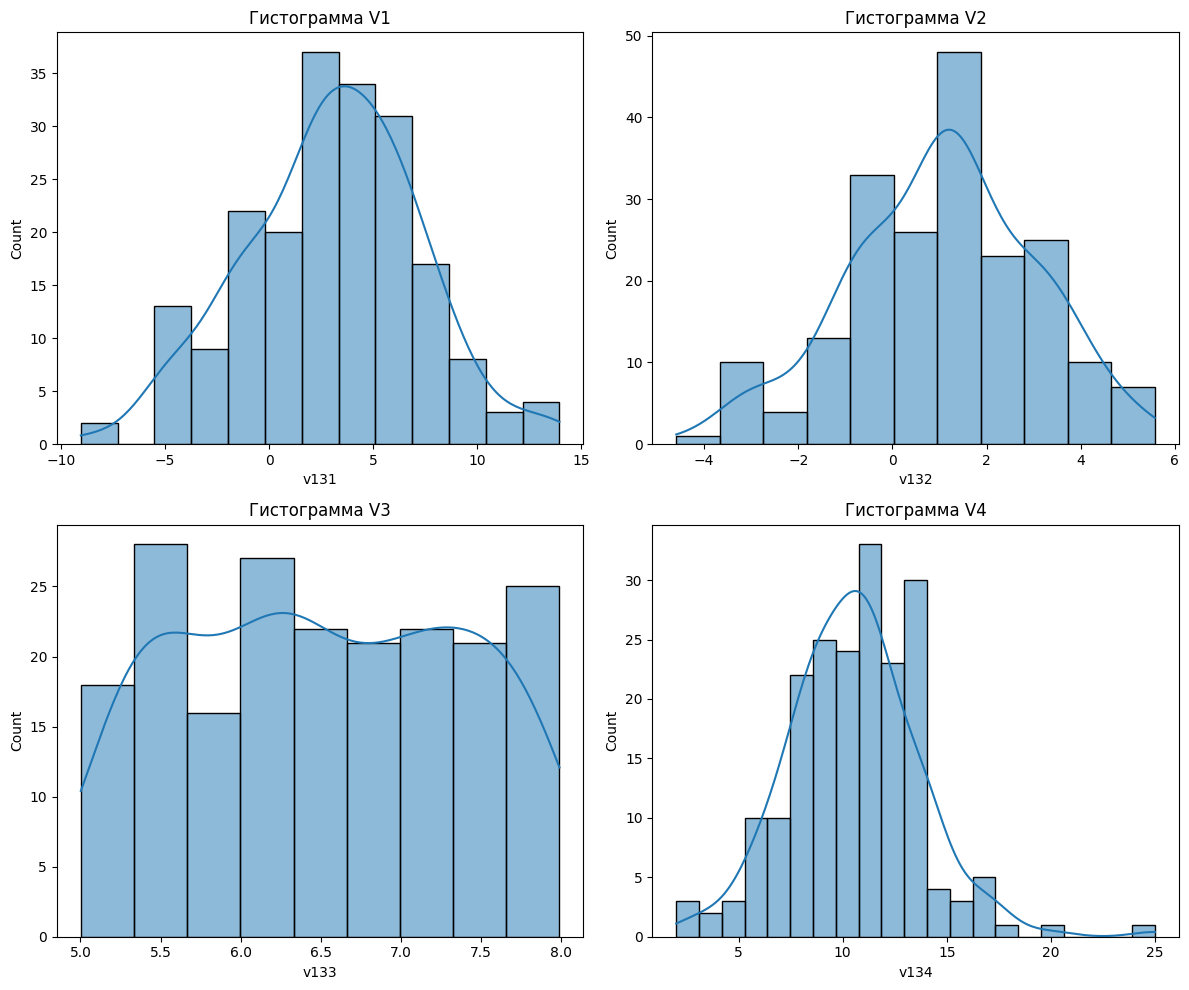

In [7]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(V1, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Гистограмма V1')

sns.histplot(V2, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Гистограмма V2')

sns.histplot(V3, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Гистограмма V3')

sns.histplot(V4, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Гистограмма V4')

plt.tight_layout()
plt.show()


In [19]:
def descriptive_stats(data):
    stats_dict = {
        'Объем выборки (n)': len(data),
        'Среднее': np.mean(data),
        'Медиана': np.median(data),
        'Дисперсия': np.var(data, ddof=1),
        'Стандартное отклонение': np.std(data, ddof=1),
        'Коэффициент асимметрии': stats.skew(data),
        'Коэффициент эксцесса': stats.kurtosis(data),
        'Минимальное значение': np.min(data),
        'Максимальное значение': np.max(data),
        'Размах выборки': np.ptp(data),
        'Нижняя квартиль (Q1)': np.percentile(data, 25),
        'Верхняя квартиль (Q3)': np.percentile(data, 75),
    }
    return stats_dict


In [20]:

stats_V1 = descriptive_stats(V1)
stats_V2 = descriptive_stats(V2)
stats_V3 = descriptive_stats(V3)
stats_V4 = descriptive_stats(V4)


print("Статистические характеристики V1:")
for k, v in stats_V1.items():
    print(f"{k}: {v}")

print("\nСтатистические характеристики V2:")
for k, v in stats_V2.items():
    print(f"{k}: {v}")

print("\nСтатистические характеристики V3:")
for k, v in stats_V3.items():
    print(f"{k}: {v}")

print("\nСтатистические характеристики V4:")
for k, v in stats_V4.items():
    print(f"{k}: {v}")


Статистические характеристики V1:
Объем выборки (n): 200
Среднее: 3.042330651615597
Медиана: 3.24236251866
Дисперсия: 17.566849111278266
Стандартное отклонение: 4.1912825138945555
Коэффициент асимметрии: -0.10466907194323638
Коэффициент эксцесса: -0.0038508159993266844
Минимальное значение: -9.04243513703
Максимальное значение: 13.9581583142
Размах выборки: 23.00059345123
Нижняя квартиль (Q1): 0.33781273369275
Верхняя квартиль (Q3): 5.8620395763725

Статистические характеристики V2:
Объем выборки (n): 200
Среднее: 1.0480258893092393
Медиана: 1.12799311818
Дисперсия: 3.933229643500426
Стандартное отклонение: 1.9832371626964906
Коэффициент асимметрии: -0.19789624679145457
Коэффициент эксцесса: -0.18279648031150364
Минимальное значение: -4.5922700602
Максимальное значение: 5.57765925343
Размах выборки: 10.16992931363
Нижняя квартиль (Q1): -0.415424220853
Верхняя квартиль (Q3): 2.4777878204975

Статистические характеристики V3:
Объем выборки (n): 200
Среднее: 6.5195654172197
Медиана: 6.464

In [23]:

mu_V1 = np.mean(V2)
sigma2_V1 = np.var(V2, ddof=1)
print(f"Оценка μ для V2: {mu_V1}")
print(f"Оценка σ² для V2: {sigma2_V1}")

Оценка μ для V2: 1.0480258893092393
Оценка σ² для V2: 3.933229643500426


In [26]:
a_V3 = np.min(V3)
b_V3 = np.max(V3)
print(f"Оценка a для V3: {a_V3}")
print(f"Оценка b для V3: {b_V3}")

Оценка a для V3: 5.00216182551
Оценка b для V3: 7.99016901628


In [25]:
lambda_V3 = np.mean(V4)
print(f"Оценка λ для V4: {lambda_V3}")

Оценка λ для V4: 10.525


In [27]:
n_V1 = len(V1)
alpha = 0.03  # 1 - γ
t_crit = stats.t.ppf(1 - alpha/2, n_V1 - 1)
SE_mu = stats.sem(V1)
CI_mu_V1 = (mu_V1 - t_crit * SE_mu, mu_V1 + t_crit * SE_mu)
print(f"Доверительный интервал для μ (V1): {CI_mu_V1}")
chi2_lower = stats.chi2.ppf(alpha/2, n_V1 - 1)
chi2_upper = stats.chi2.ppf(1 - alpha/2, n_V1 - 1)
CI_sigma2_V1 = ((n_V1 - 1) * sigma2_V1 / chi2_upper, (n_V1 - 1) * sigma2_V1 / chi2_lower)
print(f"Доверительный интервал для σ² (V1): {CI_sigma2_V1}")
z_crit = stats.norm.ppf(1 - alpha/2)
SE_lambda = np.sqrt(lambda_V3 / n_V1)
CI_lambda_V3 = (lambda_V3 - z_crit * SE_lambda, lambda_V3 + z_crit * SE_lambda)
print(f"Доверительный интервал для λ (V3): {CI_lambda_V3}")


Доверительный интервал для μ (V1): (0.40023447725624794, 1.6958173013622306)
Доверительный интервал для σ² (V1): (3.198187050029381, 4.947452667095656)
Доверительный интервал для λ (V3): (10.027178240238207, 11.022821759761793)


In [28]:
observed_freq, bins = np.histogram(V1, bins='sturges')
expected_freq = [n_V1 * (stats.norm.cdf(bins[i+1], mu_V1, np.sqrt(sigma2_V1)) - stats.norm.cdf(bins[i], mu_V1, np.sqrt(sigma2_V1))) for i in range(len(bins)-1)]

chi_squared_stat = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()
df = len(bins) - 1 - 2  # число интервалов - 1 - число параметров
chi_crit = stats.chi2.ppf(1 - alpha, df)

print(f"Статистика χ²: {chi_squared_stat}")
print(f"Критическое значение χ²: {chi_crit}")

if chi_squared_stat < chi_crit:
    print("Нет оснований отвергать гипотезу о нормальном распределении для V1.")
else:
    print("Гипотеза о нормальном распределении для V1 отвергается.")


Статистика χ²: 1418738.7096036077
Критическое значение χ²: 15.509089702796674
Гипотеза о нормальном распределении для V1 отвергается.


In [29]:
ks_stat, p_value = stats.kstest(V1, 'norm', args=(mu_V1, np.sqrt(sigma2_V1)))
print(f"Статистика K-S: {ks_stat}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print("Нет оснований отвергать гипотезу о нормальном распределении для V1.")
else:
    print("Гипотеза о нормальном распределении для V1 отвергается.")


Статистика K-S: 0.38088487239010693
P-значение: 1.354956591550158e-26
Гипотеза о нормальном распределении для V1 отвергается.


In [30]:
t_stat, p_value = stats.ttest_ind(V1, V2, equal_var=False)
print(f"Статистика t-теста: {t_stat}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print("Нет оснований отвергать гипотезу о равенстве средних X и Y.")
else:
    print("Гипотеза о равенстве средних X и Y отвергается.")

f_stat = np.var(V1, ddof=1) / np.var(V2, ddof=1)
df1 = len(V1) - 1
df2 = len(V2) - 1
f_crit_lower = stats.f.ppf(alpha/2, df1, df2)
f_crit_upper = stats.f.ppf(1 - alpha/2, df1, df2)

print(f"Статистика F-теста: {f_stat}")
print(f"Критические значения F: {f_crit_lower}, {f_crit_upper}")

if f_crit_lower < f_stat < f_crit_upper:
    print("Нет оснований отвергать гипотезу о равенстве дисперсий X и Y.")
else:
    print("Гипотеза о равенстве дисперсий X и Y отвергается.")

# Критерий Манна-Уитни
u_stat, p_value = stats.mannwhitneyu(V1, V2, alternative='two-sided')
print(f"Статистика U-теста: {u_stat}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print("Нет оснований отвергать гипотезу о равенстве распределений X и Y.")
else:
    print("Гипотеза о равенстве распределений X и Y отвергается.")

differences = V1[:len(V2)] - V2[:len(V1)]
signs = np.sign(differences)
n_positive = np.sum(signs > 0)
n_negative = np.sum(signs < 0)
n = n_positive + n_negative

# Используем биномиальный тест
p_value = stats.binom_test(n_positive, n, 0.5)
print(f"P-значение критерия знаков: {p_value}")

if p_value > alpha:
    print("Нет оснований отвергать гипотезу о равенстве медиан X и Y.")
else:
    print("Гипотеза о равенстве медиан X и Y отвергается.")

# Критерий Уилкоксона
w_stat, p_value = stats.wilcoxon(V1[:len(V2)], V2)
print(f"Статистика W-теста: {w_stat}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print("Нет оснований отвергать гипотезу об однородности выборок X и Y.")
else:
    print("Гипотеза об однородности выборок X и Y отвергается.")


Статистика t-теста: 6.082561360944136
P-значение: 3.813205394708216e-09
Гипотеза о равенстве средних X и Y отвергается.
Статистика F-теста: 4.46626581804271
Критические значения F: 0.7344284998995741, 1.3616029336235456
Гипотеза о равенстве дисперсий X и Y отвергается.
Статистика U-теста: 27125.0
P-значение: 7.169589050726635e-10
Гипотеза о равенстве распределений X и Y отвергается.


AttributeError: module 'scipy.stats' has no attribute 'binom_test'